In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark", palette="deep")

In [2]:
news = pd.read_csv('../dataset/uci-news-aggregator.csv')
news['TIMESTAMP'] = pd.to_datetime(news['TIMESTAMP'], unit='ms')

In [3]:
news.head()


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027


In [7]:
import spacy as sp
nlp = sp.load('en')

In [8]:
temp = news['TITLE'][0]

In [69]:
sentence_dict = {}
for post in news.iterrows():
    sentence_dict[post[1]['ID']] = get_ent_counts(post[1]['TITLE'])
    #print(post)

In [71]:
sentence_df = pd.DataFrame(sentence_dict).T.reset_index()

In [73]:
sentence_df = sentence_df.fillna(0)

index          8.935715e+10
ORG            1.895990e+05
PERSON         1.549920e+05
GPE            7.883900e+04
PERCENT        5.695000e+03
DATE           4.744800e+04
CARDINAL       4.693800e+04
LOC            8.306000e+03
WORK_OF_ART    2.403300e+04
TIME           3.993000e+03
MONEY          1.782000e+04
NORP           1.799800e+04
ORDINAL        8.445000e+03
LAW            9.340000e+02
PRODUCT        5.604000e+03
EVENT          2.259000e+03
FAC            3.330000e+03
QUANTITY       9.820000e+02
LANGUAGE       1.040000e+02
dtype: float64

In [103]:
sentence_cat_df.groupby('CATEGORY').mean()[sentence_cat_df.groupby('CATEGORY').mean()>=0.09].T.dropna().T.drop('ID',axis=1)

,ORG,PERSON,GPE,CARDINAL
CATEGORY,,,,
b,0.546405,0.137875,0.309381,0.096148
e,0.260637,0.751471,0.127193,0.097108
m,0.266855,0.105677,0.230198,0.126230
t,0.685926,0.180942,0.120560,0.140488


In [119]:
# sns.PairGrid(sentence_cat_df[['ORG', 'PERSON', 'GPE','CATEGORY']], hue='CATEGORY', height=2.5)
# sns.jointplot(x="PERSON", y="ORG", data=sentence_cat_df[['ORG', 'PERSON', 'GPE','CATEGORY']], kind="kde");
# plt.show()
# corr = sentence_cat_df[['ORG', 'PERSON', 'GPE','CATEGORY']].corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     square=True
# )
# plt.show()

In [138]:
news_pos = pd.read_csv('../dataset/news_pos.csv')

In [140]:
news_pos = pd.merge(news_pos, news[['ID','CATEGORY']],on='ID')

In [141]:
corr = news_pos[news_pos['CATEGORY']=='m'].corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     square=True
# )
# plt.show()
corr[(corr > 0.5) | (corr < -0.5)]

,ID,PROPN,NOUN,VERB,ADJ,ADP,PUNCT,ADV,PART,DET,NUM,SPACE,SYM,CCONJ,PRON,INTJ,AUX,X
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROPN,NaN,1.000000,-0.627114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOUN,NaN,-0.627114,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VERB,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADJ,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUNCT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PART,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
sentence_cat_df[['ORG', 'PERSON', 'GPE','CATEGORY']]

,ORG,PERSON,GPE,CATEGORY
0,1.0,0.0,0.0,b
1,1.0,1.0,0.0,b
2,1.0,0.0,1.0,b
3,1.0,1.0,0.0,b
4,1.0,0.0,0.0,b
...,...,...,...,...
422414,0.0,1.0,0.0,m
422415,0.0,0.0,0.0,m
422416,0.0,0.0,1.0,m
422417,0.0,0.0,2.0,m


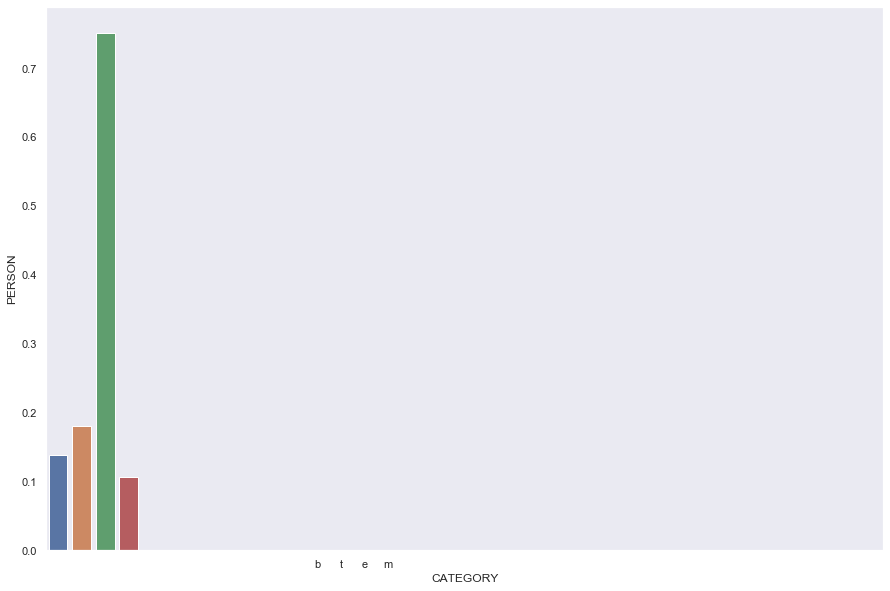

In [88]:
sentence_cat_df = pd.merge(news[['ID','CATEGORY']], sentence_df, how='inner', on='ID')
sentence_cat_df.groupby('CATEGORY').mean()


cat_map = {
    'b': 'Business',
    't': 'Science',
    'e': 'Entertainment',
    'm': 'Health'
}
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='CATEGORY', y='PERSON', data=sentence_cat_df, ci=None)
ax.set_xticks(list(range(11, 36)))
# ax.set_xlabel("Week of the year")
# ax.set_ylabel("Number of articles")
# ax.set_title("Articles published per week")
plt.show()

In [52]:
def get_pos_counts(text):
    processed_txt = nlp(text)
    pos_dict = {}
    for token in processed_txt:
        if token.pos_ in pos_dict.keys():
            pos_dict[token.pos_] += 1
        else:
            pos_dict[token.pos_] = 1
    return pos_dict

In [66]:
def get_ent_counts(text):
    processed_txt = nlp(text)
    ent_dict = {}
    for ent in processed_txt.ents:
        if ent.label_ in ent_dict.keys():
            ent_dict[ent.label_] += 1
        else:
            ent_dict[ent.label_] = 1
    return ent_dict

In [4]:
def date_printer(date):
    return "{}/{}/{}".format(date.day, date.month, date.year)


start, end = news['TIMESTAMP'].min(), news['TIMESTAMP'].max() 
print("Our dataset timeline starts at {} and ends at {}".format(date_printer(start), date_printer(end)))

Our dataset timeline starts at 10/3/2014 and ends at 28/8/2014


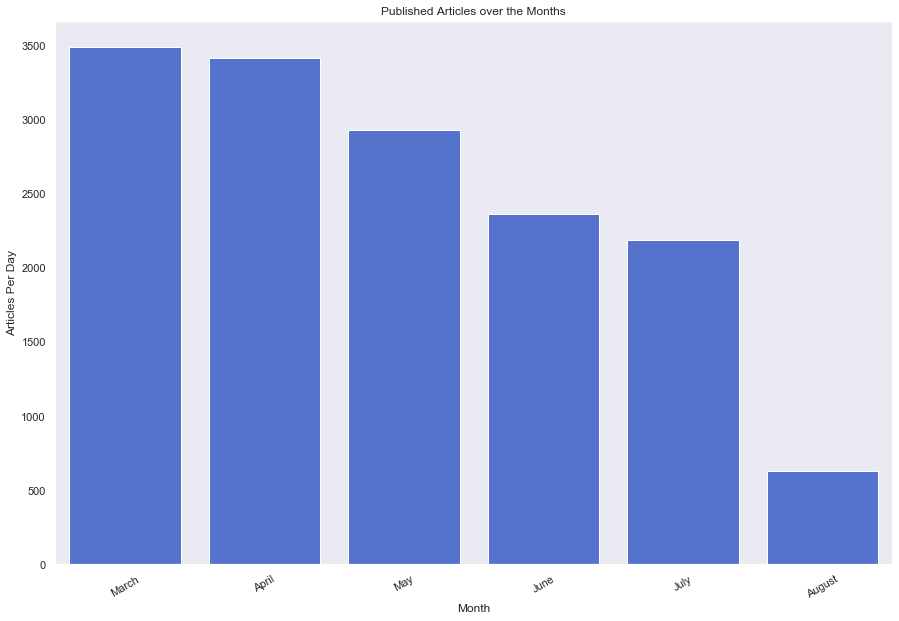

In [32]:
news['MONTH'] = news['TIMESTAMP'].apply(lambda date: date.month)
news['DAY'] = news['TIMESTAMP'].apply(lambda date: date.day)

# Some months have 30 and others have 30 days. The first and last months in our dataset and not whole.
month_days = {
    3: 21,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 27
}
articles_per_day = {}
for month in month_days:
    n_articles = len(news[news['MONTH'] == month])
    articles_per_day[month] = n_articles / month_days[month]

month_map = {
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August'
}

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(ax=ax, x=list(articles_per_day.keys()), y=list(articles_per_day.values()), color='royalblue')
ax.set_xlabel("Month")
ax.set_ylabel("Articles Per Day")
ax.set_title('Published Articles over the Months')
ax.set_xticklabels([month_map[x.get_text()] for x in ax.get_xticklabels()], rotation=30)
plt.show()

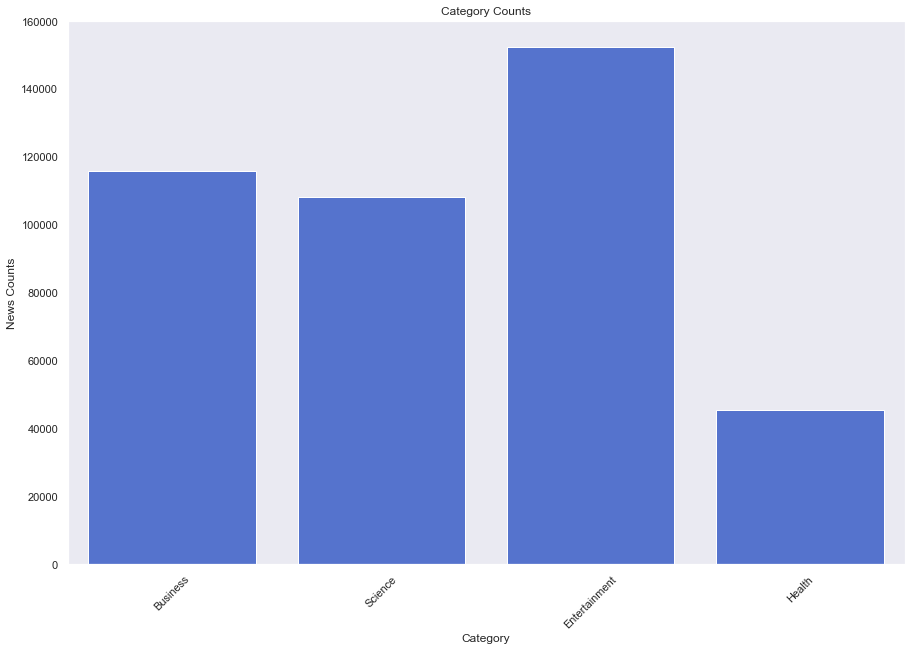

In [37]:
cat_map = {
    'b': 'Business',
    't': 'Science',
    'e': 'Entertainment',
    'm': 'Health'
}
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(ax=ax, x=news['CATEGORY'], color="royalblue")
ax.set_title("Category Counts")
ax.set_xlabel("Category")
ax.set_ylabel("News Counts")
# Manipulate the labels to make them more readable
ax.set_xticklabels([cat_map[x.get_text()] for x in ax.get_xticklabels()], rotation=45)
plt.show()

In [6]:
from collections import Counter

# Byte magic to style print output
def emphasize(s):
    """Bold the string to help get the print reader's attention.
    
    Parameters
    ----------
    s : str
        String to be decorated with bold.
    
    Returns
    -------
    str
        The string in bold.
    """
    red = '\x1b[1;31m'
    stop = '\x1b[0m'
    return red + str(s) + stop

nunique = news['PUBLISHER'].nunique()
print("There are {} different publishers. Below some of the most common:".format(emphasize(nunique)))
for key, value in Counter(news['PUBLISHER']).most_common(5):
    print("   {} posted {} articles".format(emphasize(key), emphasize(value)))

There are 10985 different publishers. Below some of the most common:
   Reuters posted 3902 articles
   Huffington Post posted 2455 articles
   Businessweek posted 2395 articles
   Contactmusic.com posted 2334 articles
   Daily Mail posted 2254 articles


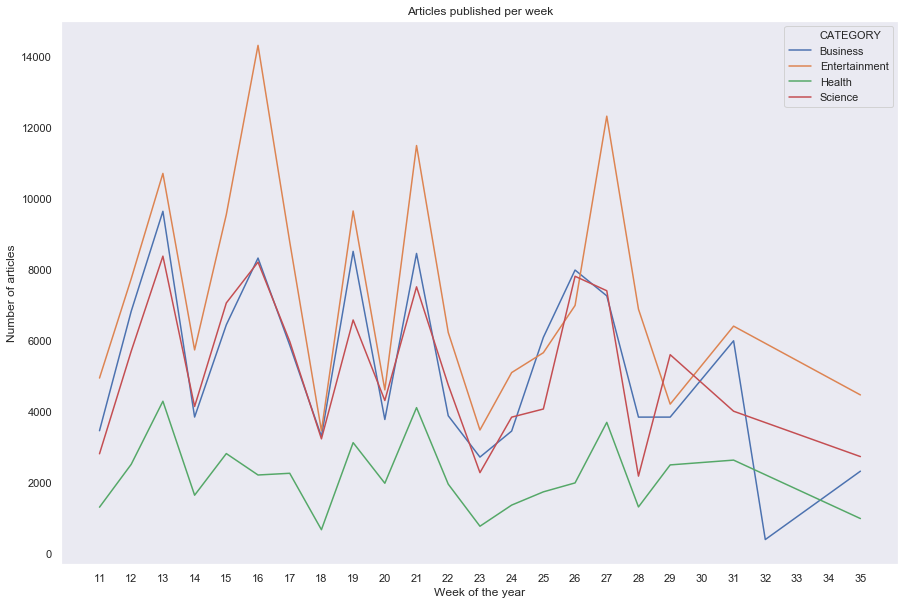

In [46]:
news['WEEK'] = news['TIMESTAMP'].apply(lambda date: date.week)

# Aggregate by week
aggregated = news[['WEEK', 'MONTH', 'CATEGORY']]
grouped = aggregated.groupby(['WEEK', 'CATEGORY']).size().reset_index(name='article_count')
grouped['CATEGORY'] = grouped['CATEGORY'].apply(lambda x: cat_map[x])

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x='WEEK', y='article_count', hue='CATEGORY', data=grouped, ci=None)
ax.set_xticks(list(range(11, 36)))
ax.set_xlabel("Week of the year")
ax.set_ylabel("Number of articles")
ax.set_title("Articles published per week")
plt.show()

In [16]:
news

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,MONTH,DAY,WEEK
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698,3,10,11
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207,3,10,11
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550,3,10,11
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.793,3,10,11
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027,3,10,11
...,...,...,...,...,...,...,...,...,...,...,...
422414,422933,Surgeons to remove 4-year-old's rib to rebuild...,http://www.cbs3springfield.com/story/26378648/...,WSHM-TV,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.cbs3springfield.com,2014-08-28 12:33:10.251,8,28,35
422415,422934,Boy to have surgery on esophagus after battery...,http://www.wlwt.com/news/boy-to-have-surgery-o...,WLWT Cincinnati,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wlwt.com,2014-08-28 12:33:10.508,8,28,35
422416,422935,Child who swallowed battery to have reconstruc...,http://www.newsnet5.com/news/local-news/child-...,NewsNet5.com,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.newsnet5.com,2014-08-28 12:33:10.771,8,28,35
422417,422936,Phoenix boy undergoes surgery to repair throat...,http://www.wfsb.com/story/26368078/phoenix-boy...,WFSB,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wfsb.com,2014-08-28 12:33:11.071,8,28,35


In [40]:
news['TITLE_LEN'] = news['TITLE'].str.split(' ').apply(len)

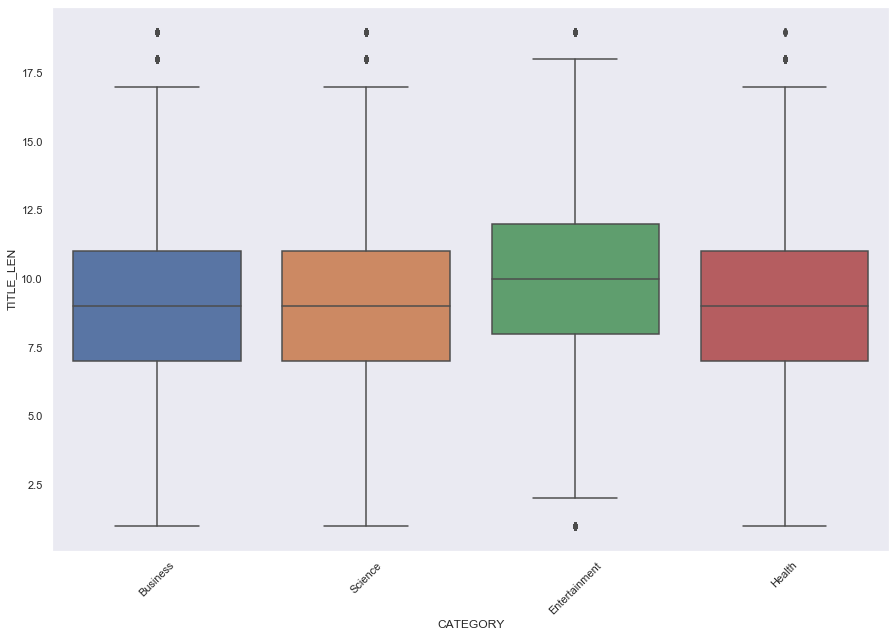

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(ax=ax, x="CATEGORY", y="TITLE_LEN", data=news[news['TITLE_LEN']<20])
ax.set_xlabel('')
ax.set_xticklabels([cat_map[x.get_text()] for x in ax.get_xticklabels()], rotation=45)
plt.show()

In [49]:
news[news['TITLE_LEN']<20].shape

(422376, 12)

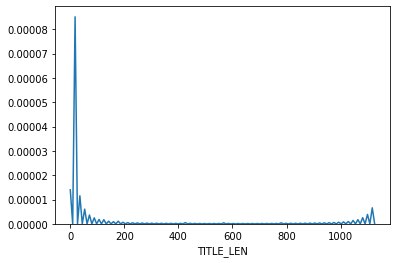

In [71]:
sns.distplot(news["TITLE_LEN"],hist = False)

In [68]:
news["TITLE_LEN"].unique()

array([  12,   11,    9,    8,   14,   10,    6,    7,   13,    4,    2,
         15,    5,   17,    3,   16,    1,   19,   20,   18,  777, 1125,
         48,  424, 1053,   21, 1040,  125,  177,  565])

In [65]:
news[news['TITLE_LEN']==21]

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,MONTH,DAY,WEEK,TITLE_LEN
119035,119371,'I did not kill my wife - I am not a murderer'...,http://www.independent.ie/entertainment/movies...,Irish Independent,e,dplR3ISnkkn9qbM8zYnygjzuPNkfM,www.independent.ie,2014-04-15 19:56:47.865,4,15,16,21
137002,137338,"For the first time, fans can bid on a visit to...",http://www.hypable.com/2014/04/18/game-of-thro...,Hypable,e,dFVFeuMI8YtTrgM1IJ682jjQOmG-M,www.hypable.com,2014-04-19 07:28:43.473,4,19,16,21
273480,273926,"If you have an iPhone, iPad or a Mac, Apple ju...",http://www.tampabay.com/blogs/latest-gadgets/a...,Tampabay.com \(blog\),t,ddXI9ba1qZ8OCNM9ls1xCgbP5DUlM,www.tampabay.com,2014-06-04 14:55:39.811,6,4,23,21
358897,359357,One glass of wine or a beer at the age of 14 c...,http://www.dailymail.co.uk/health/article-2678...,Daily Mail,m,d38fEHmL8Y-8aSM8by64-SStksZBM,www.dailymail.co.uk,2014-07-05 05:25:34.706,7,5,27,21
385758,386218,Dawn of the Planet of the Apes and Rise of the...,http://boingboing.net/2014/07/16/dawn-of-the-p...,Boing Boing,e,dg1oEqkwu3pgVxMlU7dETV69aCIBM,boingboing.net,2014-07-17 05:59:56.374,7,17,29,21
